# Structure of Lab 2

- **1. Decision Tree**
 (Fill out all **16 placeholders** in the code and **answer 3 questions**.)
  - **Part 1: ID3 (from scratch) — placeholders 1–13**


  
    - Use the **Baseball** train and test datasets (Canvas → Lab section).
    - **Notes**
      - Print the **information gain (IG)** for all features and compare them.
      - Build and **visualize the decision tree**.
      - **Compute predictions** on the test set.
    
  - **Part 2: Decision Tree (scikit-learn) — Regression**
    - Use the **Energy** train and test datasets.
    - **Tasks**
      - **Visualize** the tree at **four different depths**.
      - **Compare** their final **errors**.
      - **State** which **depth performs best** for this dataset.

- **2. SVM**
  - Proceed through the code, **answering 6 questions** one by one in **separate cells**, each inserted **after its corresponding question**.
  - For **Questions 1–5**,  use the**created dataset** .
  - For **Question 6**, use the **ex2data2.txt** dataset
  
  ( All data available on GitHub).


# <font color='#TTE99D'>**Decision Trees 🌵**</font>

## **🔸 Imports**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn import tree  #Importing directly (Not from scratch)

## **🔸 Part 1: ID3 (from Scratch)**

### Data

In [26]:
url = 'https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab2-Data/baseball.csv'
data = pd.read_csv(url)                  #(1)     read baseball train dataset with pandas
data

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [27]:
data.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Model

####  Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [28]:
labels = data['play']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9402859586706311

In [29]:
# TODO: Implement entropy(labels) -> float
def entropy(labels):
    """
    Compute entropy H(Y) for a Pandas Series of labels.
    HINT: use value_counts(normalize=True) and -sum(p*log2(p))
    """
    # TODO begin
    p = labels.value_counts() / len(labels)                           #(2)
    return -sum(p * np.log2(p))                                    #(3)
    # TODO end

# quick check
entropy(data['play'])

0.9402859586706311

####  Information Gain: now you have to calculate IG for all features

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [30]:
target = 'play'
entropy_parent = entropy(data[target])
entropy_parent

entropy_child = 0
feature = 'wind'
for value in data[feature].unique():
    subset = data[data[feature] == value]
    display(subset)
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
information_gain = entropy_parent - entropy_child

print(information_gain)

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes


,outlook,temperature,humidity,wind,play
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
13,Rain,Hot,High,Strong,No


0.04812703040826949


In [31]:
# TODO: Implement information_gain(data, feature, target) -> float

def information_gain(data, feature, target):
    """
    IG = H(parent) - sum_v (|Dv|/|D|)*H(Dv)
    """
    # TODO begin

    # Entropy of parent
    # The parent entropy is the entropy of the target column in the main dataset.
    entropy_parent = entropy(data[target])           # (4)

    # Entropy of child (Weighted sum of entropies after splitting by 'feature')
    entropy_child = 0.0

    # Loop through each unique value in the feature (e.g., 'sunny', 'overcast', 'rainy' for 'outlook')
    for value in data[feature].unique():
        # Create a subset of data where the feature equals the current value
        subset = data[data[feature] == value]        # (5)

        # Calculate the weight (wi) of the subset: |Dv| / |D|
        wi = len(subset) / len(data)                 # (6)

        # Add the weighted entropy of the subset to the total child entropy
        entropy_child += wi * entropy(subset[target])

    # IG = H(parent) - H(child)
    return entropy_parent - entropy_child

    # TODO end

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>: Now, you should calculate IG for all features and say which one is more important**

In [32]:
information_gain(data, 'wind', 'play')
information_gain(data, 'humidity', 'play')
information_gain(data, 'outlook', 'play')
information_gain(data, 'temperature', 'play')

0.10389267691729642

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'> Answer:

In [33]:
information_gain(data, 'wind', 'play')

0.04812703040826949

In [34]:
information_gain(data, 'humidity', 'play')

0.15183550136234159

In [35]:
information_gain(data, 'outlook', 'play')

0.24674981977443933

In [36]:
information_gain(data, 'temperature', 'play')

0.10389267691729642

In [37]:
target_attribute = 'play'

# Calculate IG for all features
ig_outlook = information_gain(data, 'outlook', target_attribute)
ig_temperature = information_gain(data, 'temperature', target_attribute)
ig_humidity = information_gain(data, 'humidity', target_attribute)
ig_wind = information_gain(data, 'wind', target_attribute)

# Print the results
print(f"IG('outlook'):     {ig_outlook:.3f}")
print(f"IG('temperature'): {ig_temperature:.3f}")
print(f"IG('humidity'):    {ig_humidity:.3f}")
print(f"IG('wind'):        {ig_wind:.3f}")

IG('outlook'):     0.247
IG('temperature'): 0.104
IG('humidity'):    0.152
IG('wind'):        0.048


#Result

The feature Outlook is the most important, with the highest information gain (0.247), meaning it best reduces uncertainty about whether to play.
Humidity and Temperature are moderately informative, while Wind contributes the least to the prediction.

####  Decision Tree & Node

Based on the following images, you need a Node class and a make_tree function. The Node class is already written, and you are expected to fill in the make_tree function

In [38]:
import os, base64
from IPython.display import HTML, display

def embed_image(path, width=200):
    assert os.path.exists(path), f"Not found: {path}"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("ascii")
    return f'<img src="data:image/png;base64,{b64}" width="{width}"/>'

def show_images(paths, width=200, gap=10):
    imgs = "".join(embed_image(p, width) for p in paths)
    html = f'<div style="display:flex; gap:{gap}px;">{imgs}</div>'
    display(HTML(html))




In [39]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

Node(feature='wind')
# Node(label='yes')

DecisionNode(feature="wind", children={})

<font color='#EE15D'>**Fill out make_tree function**

In [40]:
# TODO: Implement make_tree(data, target) -> Node
def make_tree(data, target):
    """
    Recursively build an ID3 tree.
    Base cases:
      - if all labels same -> leaf(label)
      - if no features left -> leaf(majority class)
    Otherwise:
      - choose feature with max IG
      - for each value of that feature, build subtree on the subset (drop that feature)
    """
    # TODO begin
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]                   #(7)

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]                                                      #(8)

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():                                                       #(9)
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)                         #(10)
        node.children[value] = make_tree(subset, target)

    return node
    # TODO end

In [41]:
tree = make_tree(data, 'play')
tree

tree.feature

'outlook'

### Evaluation

In [42]:
data_test = pd.read_csv(url)
data_test.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data_test

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [43]:
# TODO : Implement predict(node, sample_dict) -> label
def predict(node, sample):
    """
    Predict class for one sample (dict-like).
    If unseen branch happens, you may fallback to current node's label (or majority of subtree).
    """

    if node.feature is None:
        return node.label	                                                         #(11)

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        # simple fallback: return current node's most frequent descendant label
        return node.label	                                                           #(12)

my_tree = make_tree(data, 'play')
[predict(my_tree, sample) for _, sample in data_test.iterrows()]                      #(13)

['No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No']

<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Visulize the tree

<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Answer:

### Visualization

In [44]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

ModuleNotFoundError: No module named 'graphviz'

## **🔸 Part 2: Decision Tree (sklearn): Regression**

In [ ]:
from sklearn import tree

### Regression

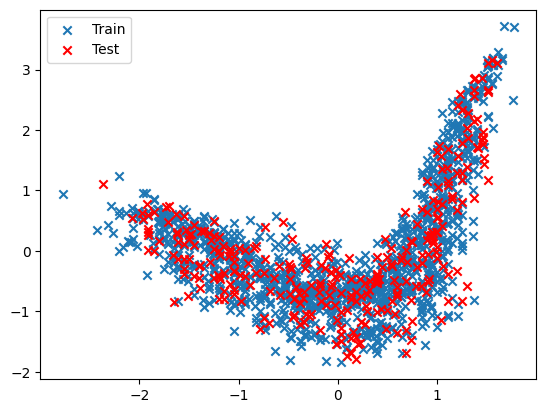

In [ ]:
TRAIN_URL = 'https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab2-Data/energy-train-l.csv'
TEST_URL = 'https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab2-Data/energy-test-l.csv'


df = pd.read_csv(TRAIN_URL)     #(14) read csv train energy dataset with pandas
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(TEST_URL)           #(15) read csv test energy dataset with pandas
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.legend(['Train', 'Test'])

<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'> change the depth of the tree (1,2,3,4) and compare the data points and the trees

<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'> Answer:

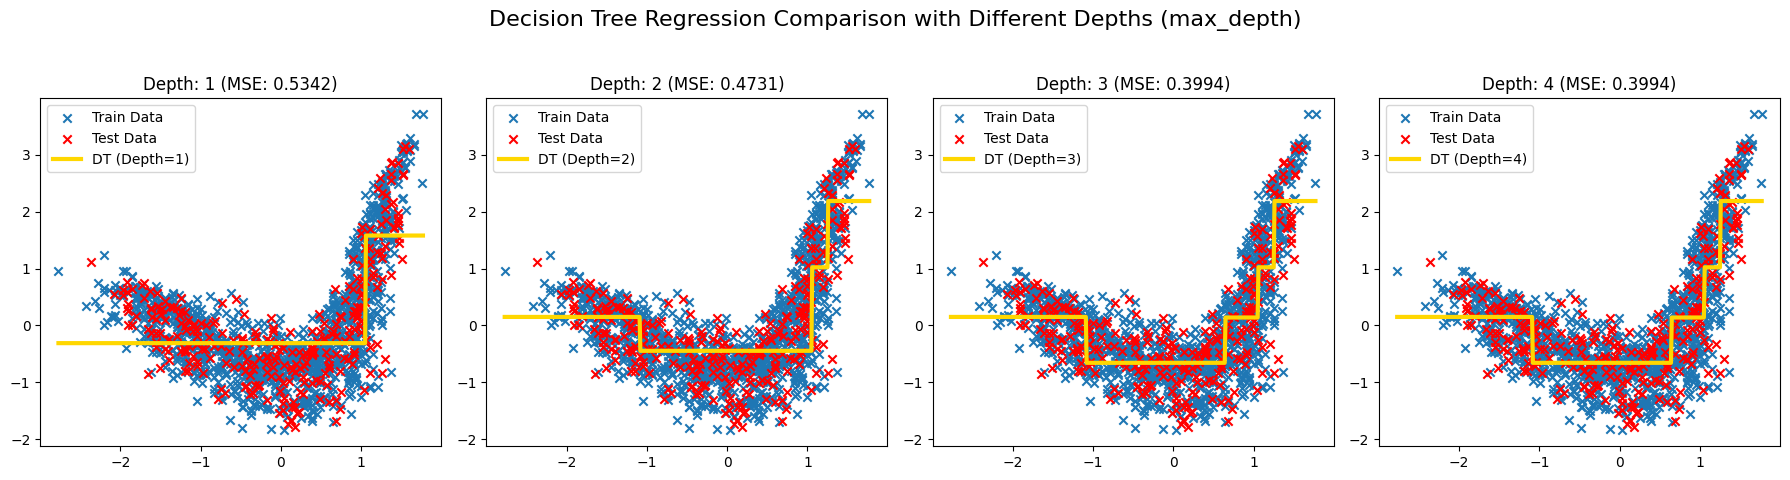

In [ ]:
depths = [1, 2, 3, 4]                               #(16) different depths

# Set up the plotting area to compare all 4 models
fig, axes = plt.subplots(1, len(depths), figsize=(18, 5))
fig.suptitle('Decision Tree Regression Comparison with Different Depths (max_depth)', fontsize=16)

# Loop through each depth
for i, depth in enumerate(depths):
    # Initialize and train the regressor
    reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=0.05)
    reg.fit(x_train, y_train)

    # Generate data points for plotting the prediction line
    # np.arange is used to create a continuous line for regression visualization
    xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
    yp = reg.predict(xp)

    # Calculate Mean Squared Error (MSE) for comparison in the title
    y_test_pred = reg.predict(x_test)
    mse = np.mean((y_test_pred - y_test.flatten())**2)

    # Plotting
    ax = axes[i]
    ax.scatter(x_train, y_train, marker='x', label='Train Data')
    ax.scatter(x_test, y_test, c='r', marker='x', label='Test Data')
    ax.plot(xp, yp, color='gold', linewidth=3, label=f'DT (Depth={depth})')

    ax.set_title(f'Depth: {depth} (MSE: {mse:.4f})')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

- Model Fit and Complexity

Depth 1: The model is underfitting. The regression line is overly simplistic and fails to capture the underlying pattern in the data. This is reflected in the highest MSE (0.5342).   
Depth 2: The model begins to capture more structure, reducing the MSE to 0.4731.   
Depth 3: The regression line becomes more adaptive to the data, and the MSE drops significantly to 0.3994.   
Depth 4: The model fits the training data even more closely, but the MSE remains the same as depth 3, suggesting no further improvement in generalisation.

- Bias-Variance Trade-off

As depth increases, bias decreases (better fit to training data), but variance may increase (risk of overfitting).   
Depth 3 appears to strike a good balance between bias and variance, achieving the lowest test error without excessive complexity.

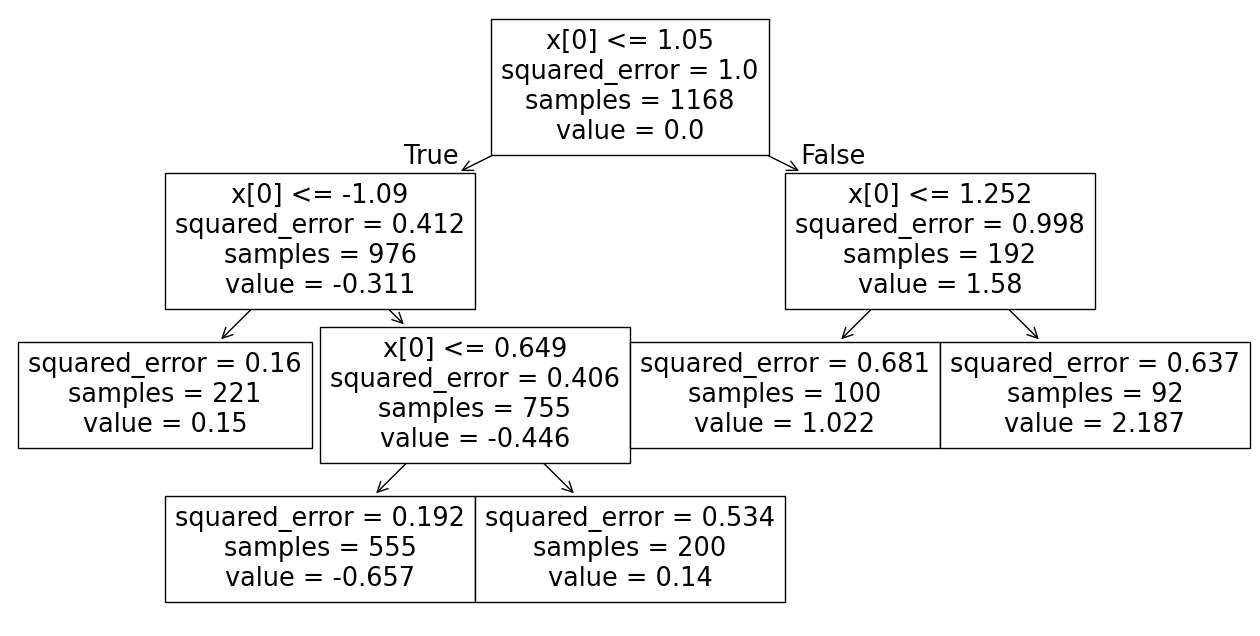

In [ ]:
plt.figure(figsize=(16, 8))
tree.plot_tree(reg);

 Tree Structure

The decision tree diagram shows how the tree splits the data based on feature thresholds. As depth increases, the tree becomes more granular, allowing finer predictions but also increasing the risk of overfitting.

In [ ]:
reg.score(x_train, y_train), reg.score(x_test, y_test)

(0.6786002767516198, 0.6102814513496133)

- Interpretation of the R^2 values   

These scores indicate a moderate fit. The model captures a good portion of the data's structure but isn't perfect.
The fact that the test score is slightly lower than the training score is expected and suggests the model generalises reasonably well without overfitting.